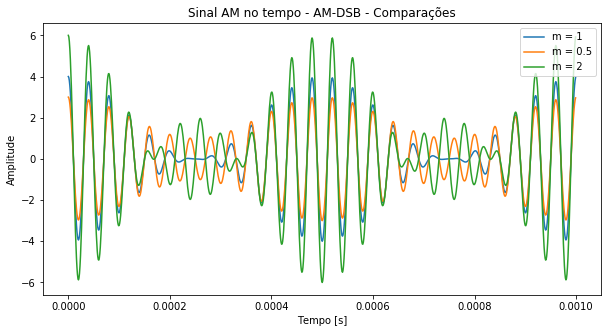

Potência via FFT (para m = 1.0) =  3.0
Potência via FFT (para m = 0.5) =  2.5
Potência via FFT (para m = 2.0) =  4.0


In [22]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu1 = 1                                                        # Índice de modulação
Mu2 = 0.5                                                      # Índice de modulação
Mu3 = 2                                                        # Índice de modulação

fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s1 = Ac*(1+Mu1*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s2 = Ac*(1+Mu2*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s3 = Ac*(1+Mu3*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Gráfico do AM-DSB no tempo
plt.figure(1,[10,5])
plt.plot(t,s1)
plt.plot(t,s2)
plt.plot(t,s3)

plt.title("Sinal AM no tempo - AM-DSB - Comparações")
plt.legend(["m = 1", "m = 0.5", "m = 2"])
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

plt.show()

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f1 = np.abs((fftpack.fft(s1)))/N                              # Cálculo da FFT
S_f2 = np.abs((fftpack.fft(s2)))/N                              # Cálculo da FFT
S_f3 = np.abs((fftpack.fft(s3)))/N                              # Cálculo da FFT

Px_fft1 = np.sum(S_f*np.conj(S_f1))                              # Cálculo da potência na frêquencia
Px_fft2 = np.sum(S_f*np.conj(S_f2))                              # Cálculo da potência na frêquencia
Px_fft3 = np.sum(S_f*np.conj(S_f3))                              # Cálculo da potência na frêquencia

print('Potência via FFT (para m = 1.0) = ',abs(Px_fft1))
print('Potência via FFT (para m = 0.5) = ',abs(Px_fft2))
print('Potência via FFT (para m = 2.0) = ',abs(Px_fft3))

O erro médio quadrático =  1.56965503165


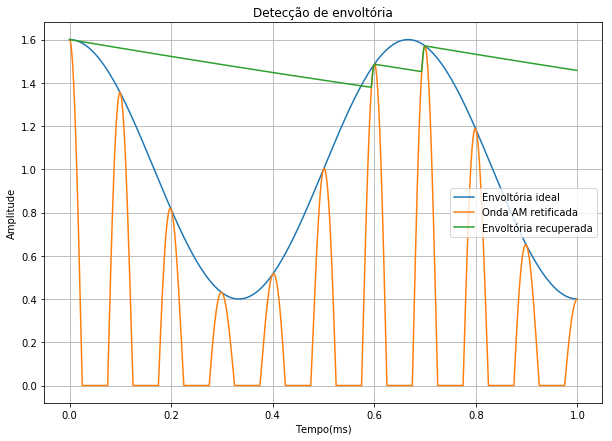

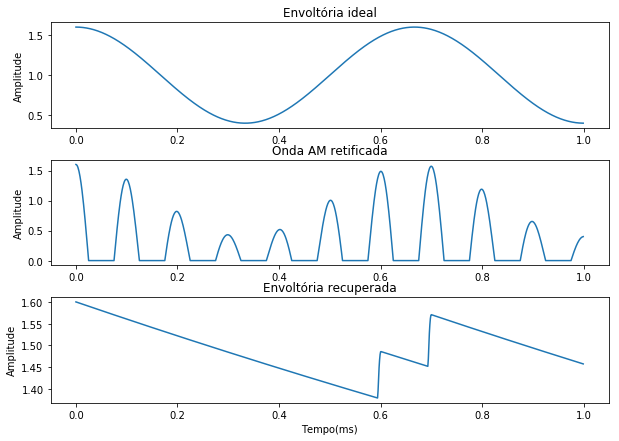

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

tau = 1e-4                                                      # Constante de tempo do detector de envelope
tau = 2e-4                                                      # Constante de tempo do detector de envelope
tau = 4e-3                                                      # Constante de tempo do detector de envelope

Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out
    
# Cálculo do erro médio quadrático

Erro = (np.sum((x_AM - x_env)**2))/len(x_AM)

print('O erro médio quadrático = ',abs(Erro))


    
# gráfico composto
plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada"])
plt.show()

## Gráficos com a função plt.plot()
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(t*1000,x_envIdeal)                             
plt.title("Envoltória ideal")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(312)
plt.plot(t*1000,x_AM)                             
plt.title("Onda AM retificada")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(313)
plt.plot(t*1000,x_env)                             
plt.title("Envoltória recuperada")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")

plt.subplots_adjust(hspace=0.3) # Ajustando espaço entre subplots

plt.show()

